In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_yahoo_finance_data(ticker: str, start_date: str = None, end_date: str = None):
    # Create a ticker object
    stock = yf.Ticker(ticker)
    
    # Fetch historical market data
    hist = stock.history(period="max", start=start_date, end=end_date)
    
    # Return the data
    return hist

# Example usage
ticker = '^GSPC'  # Apple Inc. ticker symbol
data = get_yahoo_finance_data(ticker)

In [3]:
tickers = {
    "S&P500": "^GSPC",
    # "Nasdaq": "^IXIC",
    "Crude Oil": "CL=F",
    "Silver": "SI=F",
    "Iron": "TIO=F",
    "Natural Gas": "NG=F",
    # "NIFTY 50": "^NSEI",
    "NYSE Composite": "^NYA",
    "Chinese Yuan": "CNYUSD=X",
    "Canadian Dollar": "CADUSD=X",
    "Euro": "EURUSD=X",
    "VIX": "^VIX",
    # "Fed Mortgage Rate": "FNMA",
    "Interest Rate 10y": "^TNX",
    "Interest Rate 30y": "^TYX",
    "Gold": "GC=F"
}

In [4]:
dfs = {
    name: get_yahoo_finance_data(ticker) for name, ticker in tickers.items()
}

# Convert indices to date-only format and find the intersection of all dates
common_dates = set.intersection(*(set(df.index.date) for df in dfs.values()))

# Find the earliest common date
earliest_common_date = min(common_dates)

print(f"The earliest common date is: {earliest_common_date}")

# Filter dataframes to the common date range
dfs = {name: df.loc[str(earliest_common_date):] for name, df in dfs.items()}

The earliest common date is: 2010-10-14


In [5]:
print([dfs[key].head(5)["Close"] for key in tickers.keys()])

[Date
2010-10-14 00:00:00-04:00    1173.810059
2010-10-15 00:00:00-04:00    1176.189941
2010-10-18 00:00:00-04:00    1184.709961
2010-10-19 00:00:00-04:00    1165.900024
2010-10-20 00:00:00-04:00    1178.170044
Name: Close, dtype: float64, Date
2010-10-14 00:00:00-04:00    82.690002
2010-10-15 00:00:00-04:00    81.250000
2010-10-18 00:00:00-04:00    83.080002
2010-10-19 00:00:00-04:00    79.489998
2010-10-20 00:00:00-04:00    81.769997
Name: Close, dtype: float64, Date
2010-10-14 00:00:00-04:00    24.417000
2010-10-15 00:00:00-04:00    24.271999
2010-10-18 00:00:00-04:00    24.396999
2010-10-19 00:00:00-04:00    23.764000
2010-10-20 00:00:00-04:00    23.848000
Name: Close, dtype: float64, Date
2010-10-14 00:00:00-04:00    148.789993
2010-10-15 00:00:00-04:00    146.000000
2010-10-18 00:00:00-04:00    143.070007
2010-10-19 00:00:00-04:00    140.919998
2010-10-20 00:00:00-04:00    142.880005
Name: Close, dtype: float64, Date
2010-10-14 00:00:00-04:00    3.657
2010-10-15 00:00:00-04:00   

In [6]:
for name, df in dfs.items():
    df.index = df.index.date
    dfs[name] = df

In [7]:
combined_df = pd.DataFrame(index=dfs["S&P500"].index)
rel_column = "Close"

for feature, df in dfs.items():
    combined_df[f"{feature}_{rel_column}"] = df['Close']
    # print(df['Close'])
combined_df.index = pd.DatetimeIndex(combined_df.index)

combined_df

,S&P500_Close,Crude Oil_Close,Silver_Close,Iron_Close,Natural Gas_Close,NYSE Composite_Close,Chinese Yuan_Close,Canadian Dollar_Close,Euro_Close,VIX_Close,Interest Rate 10y_Close,Interest Rate 30y_Close,Gold_Close
2010-10-14,1173.810059,82.690002,24.417000,148.789993,3.657,7546.589844,0.150240,0.996910,1.396726,19.879999,2.495,3.898,1376.699951
2010-10-15,1176.189941,81.250000,24.271999,146.000000,3.535,7520.600098,0.150525,0.995718,1.407202,19.030001,2.576,3.999,1371.099976
2010-10-18,1184.709961,83.080002,24.396999,143.070007,3.431,7571.100098,0.150807,0.987264,1.396433,19.090000,2.491,3.927,1371.199951
2010-10-19,1165.900024,79.489998,23.764000,140.919998,3.513,7423.649902,0.150734,0.983158,1.393592,20.629999,2.475,3.902,1335.099976
2010-10-20,1178.170044,81.769997,23.848000,142.880005,3.539,7523.810059,0.150725,0.968054,1.373909,19.790001,2.470,3.888,1343.300049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-27,5738.169922,68.180000,31.518999,92.980003,2.902,19501.220703,0.142674,0.742077,1.117718,16.959999,3.749,4.098,2644.300049
2024-09-30,5762.479980,68.169998,31.164000,93.830002,2.923,19516.439453,0.142647,0.740258,1.116982,16.730000,3.802,4.134,2636.100098
2024-10-01,5708.750000,69.830002,31.445000,108.739998,2.896,19473.929688,0.142501,0.739251,1.113660,19.260000,3.743,4.080,2667.300049
2024-10-02,5709.540039,70.099998,31.628000,109.290001,2.886,19481.789062,0.142239,0.741037,1.106390,18.900000,3.785,4.132,2647.100098


In [8]:
num_rows_with_missing_values = combined_df.isnull().any(axis=1).sum()
print(f"The sum of rows with at least one missing value is: {num_rows_with_missing_values}")

The sum of rows with at least one missing value is: 21


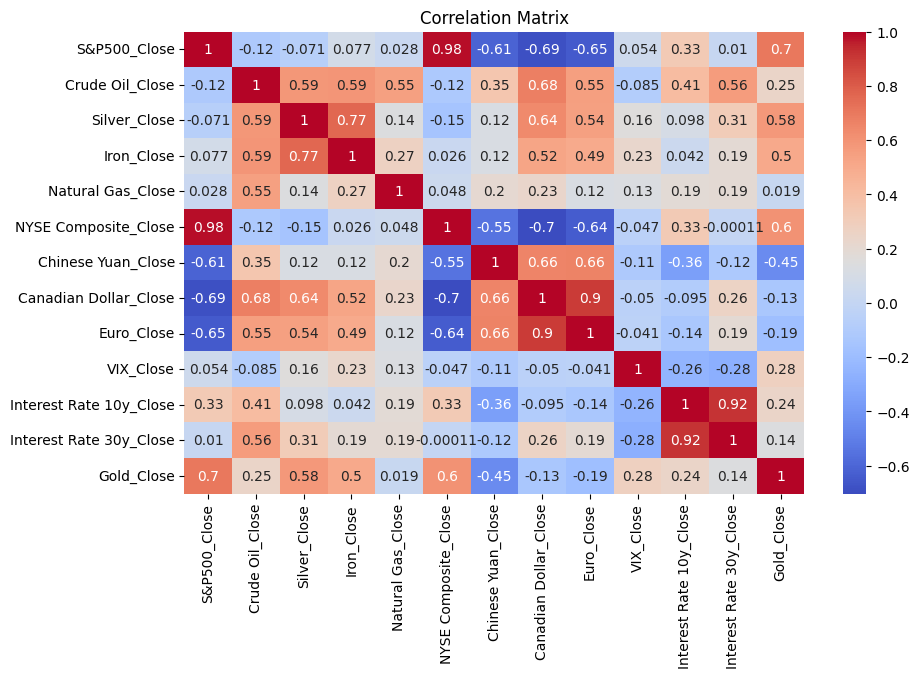

In [9]:
correlation_matrix = combined_df.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
combined_df.to_csv("combined_ticks.csv")